# RNN Experience

In [1]:
import numpy as np
import pandas as pd
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Masking
import matplotlib.pyplot as plt
import os
import tensorflow as tf

# 1.1 Simple Model Architectures(LSTM)

In [2]:
def create_model0(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model1(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model2(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model3(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model4(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(96, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

In [3]:
METADATA_PATH = r'C:\Users\Gui\Documents\Uni\AC2\UrbanSound8K\metadata/UrbanSound8K.csv'
FEATURES_PATH = r'C:\Users\Gui\Documents\Uni\AC2\urban_sound_features.h5'

def load_data(data):
    """Load features and labels from HDF5 file for given data rows"""
    X, y = [], []
    
    with h5py.File(FEATURES_PATH, 'r') as hf:
        for _, row in data.iterrows():
            fold = row['fold']
            file_name = os.path.splitext(row['slice_file_name'])[0]
            try:
                features = hf[f'fold_{fold}'][file_name][:]
                X.append(features)
                y.append(row['classID'])
            except:
                print(f"Could not load features for {file_name}")
                continue
    
    return np.array(X), np.array(y)

def evaluate_first_fold(model_type, model_name = "Model", batch_size = 32, epohcs = 30, seed=42):
    # Clear previous session and set random seeds
    tf.keras.backend.clear_session()
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    # Load metadata
    metadata = pd.read_csv(METADATA_PATH)
    num_classes = len(metadata['classID'].unique())
    
    # Get input shape from first sample
    with h5py.File(FEATURES_PATH, 'r') as hf:
        fold_1 = hf['fold_1']
        first_sample = fold_1[list(fold_1.keys())[0]][:]
        input_shape = first_sample.shape
    
    # Using folds 1-8 for training, 9 for validation
    validation_fold = 9
    test_fold = 10
    val_data = metadata[metadata['fold'] == validation_fold]
    train_data = metadata[(metadata['fold'] != test_fold) & 
                            (metadata['fold'] != validation_fold)]
        
    # Load data
    X_train, y_train = load_data(train_data)
    X_val, y_val = load_data(val_data)

    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',           # Monitor validation loss
        patience=3,                   # Number of epochs with no improvement
        restore_best_weights=True,    # Restore model weights from the epoch with the best value
        verbose=0                     # Print message when early stopping is triggered
    )
        
    # Create and train model
    model = model_type(input_shape, num_classes)
    history = model.fit(X_train, y_train, 
                      validation_data=(X_val, y_val),
                      callbacks=[early_stopping],
                      epochs=epohcs, batch_size=batch_size, verbose=0)
    
    
    plt.figure(figsize=(12, 4))
   
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
   
    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    final_val_acc = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    print(f"\nFinal Validation Metrics:")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")

    # Get best validation metrics
    best_epoch = np.argmin(history.history['val_loss'])
    best_val_acc = history.history['val_accuracy'][best_epoch]
    best_val_loss = history.history['val_loss'][best_epoch]

    print(f"\nBest Validation Metrics (Epoch {best_epoch + 1}):")
    print(f"Validation Accuracy: {best_val_acc:.4f}")
    print(f"Validation Loss: {best_val_loss:.4f}")
    
    return history

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


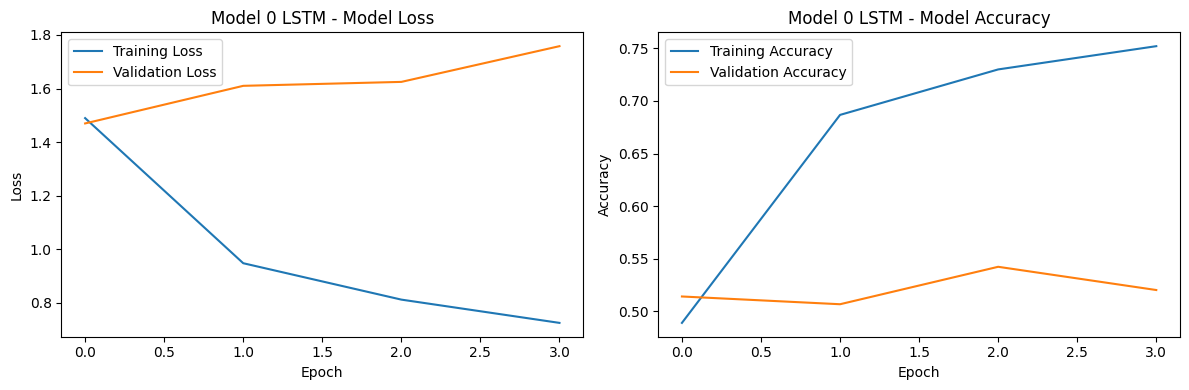


Final Validation Metrics:
Validation Accuracy: 0.5202
Validation Loss: 1.7582

Best Validation Metrics (Epoch 1):
Validation Accuracy: 0.5141
Validation Loss: 1.4695


In [4]:
results_model0 = evaluate_first_fold(create_model0, "Model 0 LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


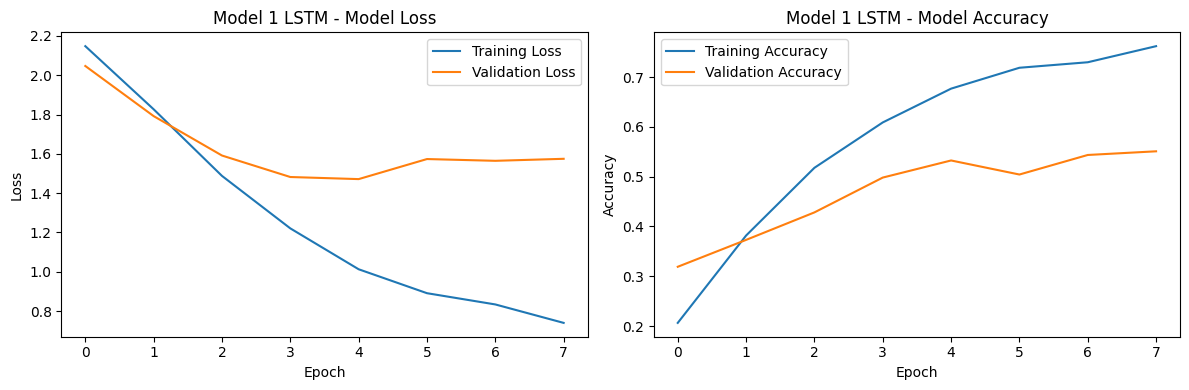


Final Validation Metrics:
Validation Accuracy: 0.5509
Validation Loss: 1.5747

Best Validation Metrics (Epoch 5):
Validation Accuracy: 0.5325
Validation Loss: 1.4714


In [5]:
results_model1 = evaluate_first_fold(create_model1, "Model 1 LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


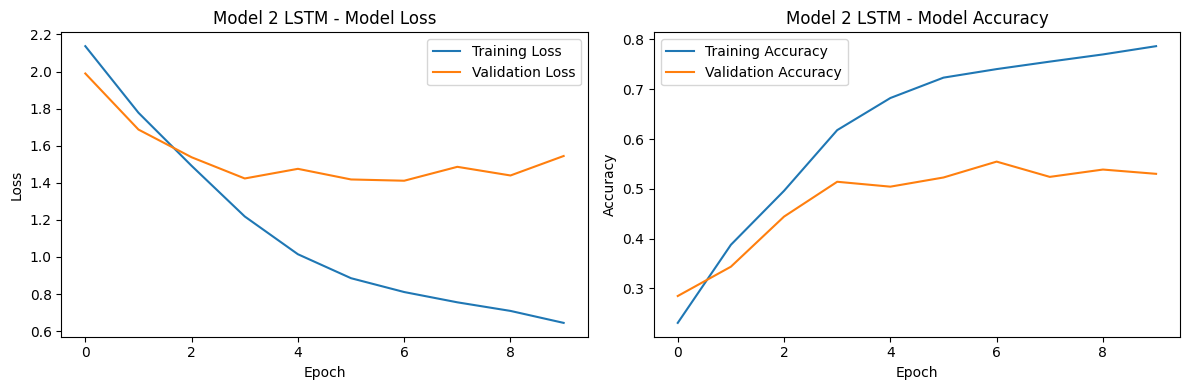


Final Validation Metrics:
Validation Accuracy: 0.5301
Validation Loss: 1.5443

Best Validation Metrics (Epoch 7):
Validation Accuracy: 0.5546
Validation Loss: 1.4110


In [6]:
results_model2 = evaluate_first_fold(create_model2, "Model 2 LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


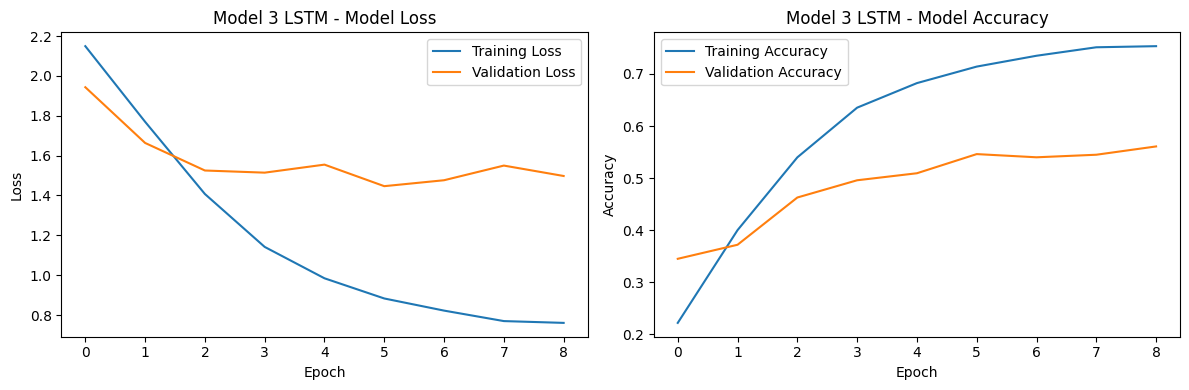


Final Validation Metrics:
Validation Accuracy: 0.5607
Validation Loss: 1.4978

Best Validation Metrics (Epoch 6):
Validation Accuracy: 0.5460
Validation Loss: 1.4467


In [7]:
results_model3 = evaluate_first_fold(create_model3, "Model 3 LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


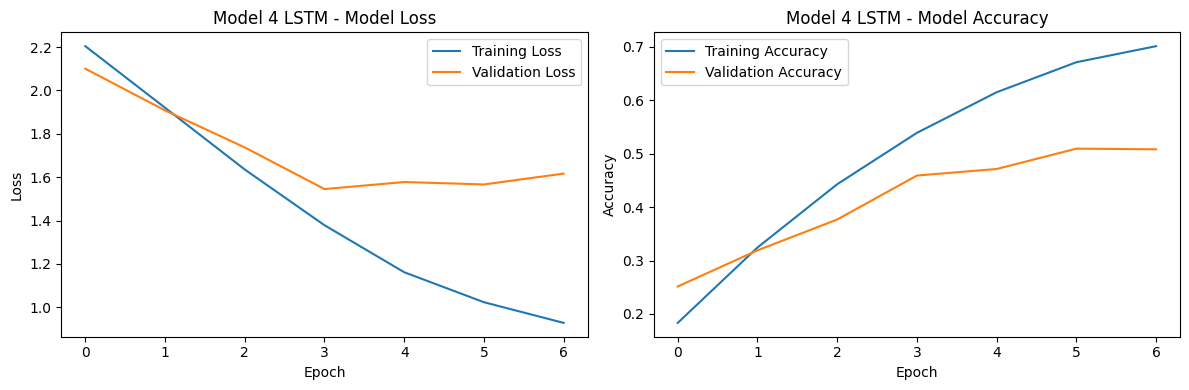


Final Validation Metrics:
Validation Accuracy: 0.5080
Validation Loss: 1.6167

Best Validation Metrics (Epoch 4):
Validation Accuracy: 0.4589
Validation Loss: 1.5454


In [8]:
results_model4 = evaluate_first_fold(create_model4, "Model 4 LSTM")

# 1.2 Optimizers(LSTM)

In [9]:
def create_modelrmsprop(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_modelsgd(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_modeladamw(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_modeladadelta(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = LSTM(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = LSTM(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


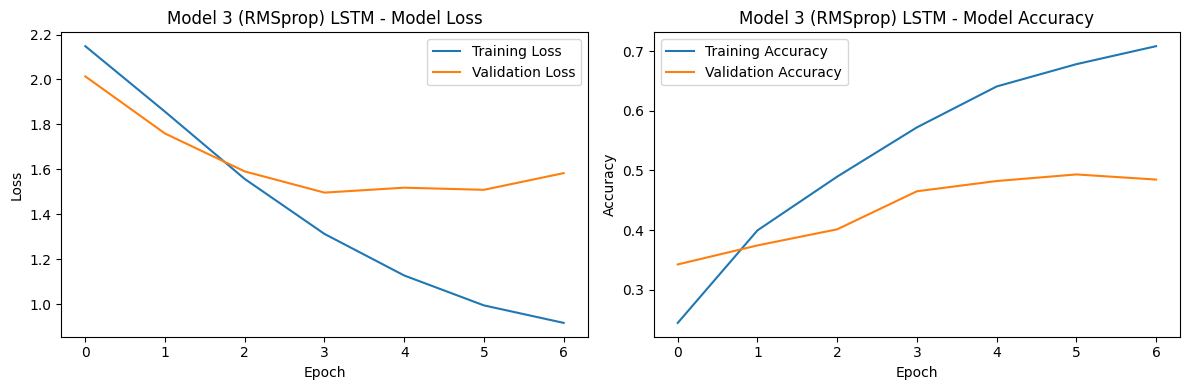


Final Validation Metrics:
Validation Accuracy: 0.4847
Validation Loss: 1.5830

Best Validation Metrics (Epoch 4):
Validation Accuracy: 0.4650
Validation Loss: 1.4963


In [11]:
results_modelrms = evaluate_first_fold(create_modelrmsprop, "Model 3 (RMSprop) LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


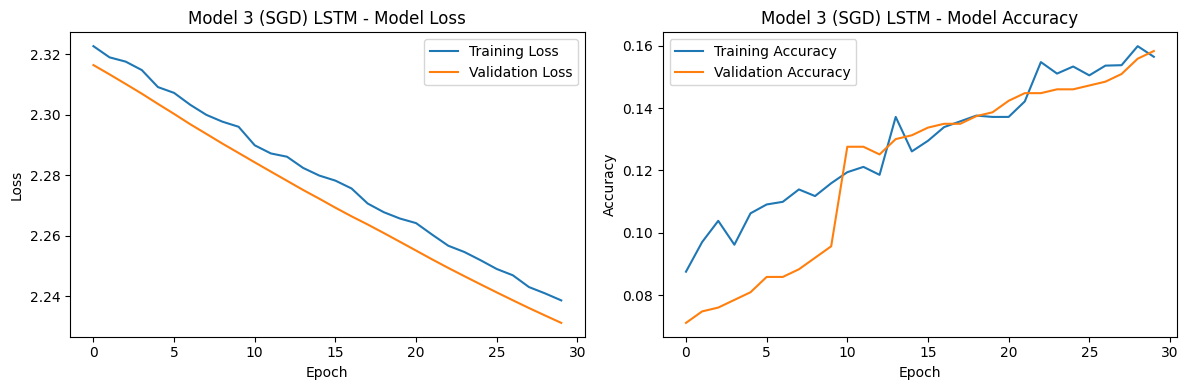


Final Validation Metrics:
Validation Accuracy: 0.1583
Validation Loss: 2.2312

Best Validation Metrics (Epoch 30):
Validation Accuracy: 0.1583
Validation Loss: 2.2312


In [12]:
results_modelsgd = evaluate_first_fold(create_modelsgd, "Model 3 (SGD) LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


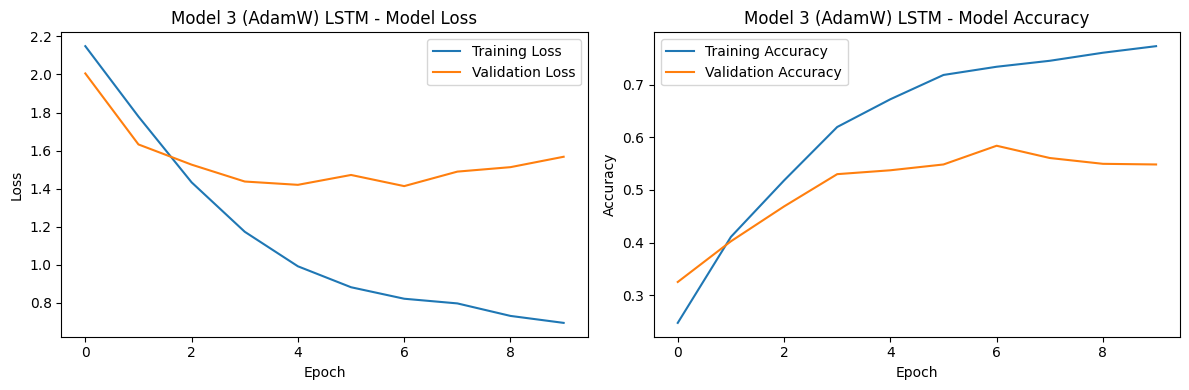


Final Validation Metrics:
Validation Accuracy: 0.5485
Validation Loss: 1.5676

Best Validation Metrics (Epoch 7):
Validation Accuracy: 0.5840
Validation Loss: 1.4134


In [13]:
results_modeladamw = evaluate_first_fold(create_modeladamw, "Model 3 (AdamW) LSTM")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


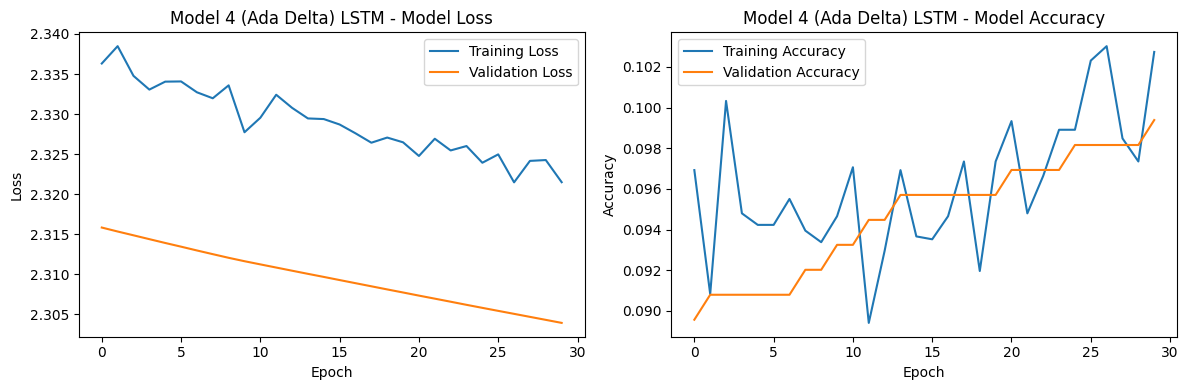


Final Validation Metrics:
Validation Accuracy: 0.0994
Validation Loss: 2.3039

Best Validation Metrics (Epoch 30):
Validation Accuracy: 0.0994
Validation Loss: 2.3039


In [ ]:
results_modeladamdelta = evaluate_first_fold(create_modeladadelta, "Model 3 (Ada Delta) LSTM")

# 1.3 Batch size(LSTM) 

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


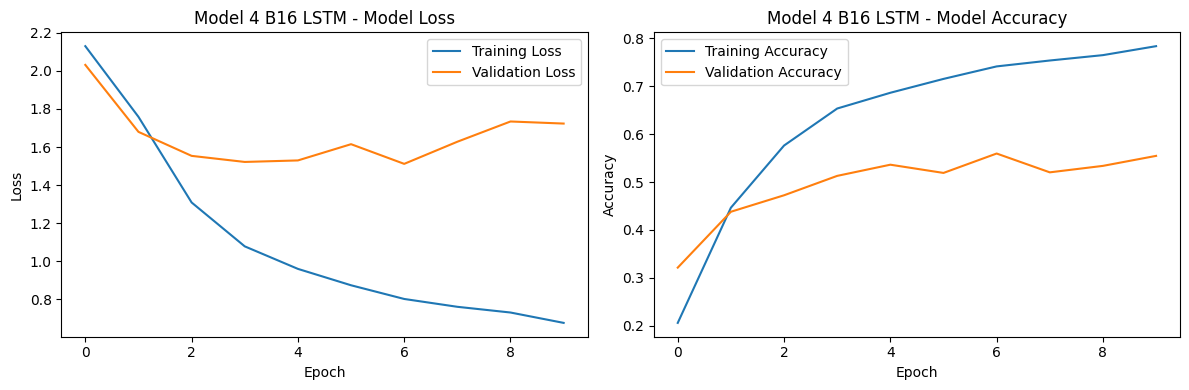


Final Validation Metrics:
Validation Accuracy: 0.5546
Validation Loss: 1.7234

Best Validation Metrics (Epoch 7):
Validation Accuracy: 0.5595
Validation Loss: 1.5114


In [ ]:
results_model3_16 = evaluate_first_fold(create_model3, "Model 3 B16 LSTM", batch_size= 16)

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


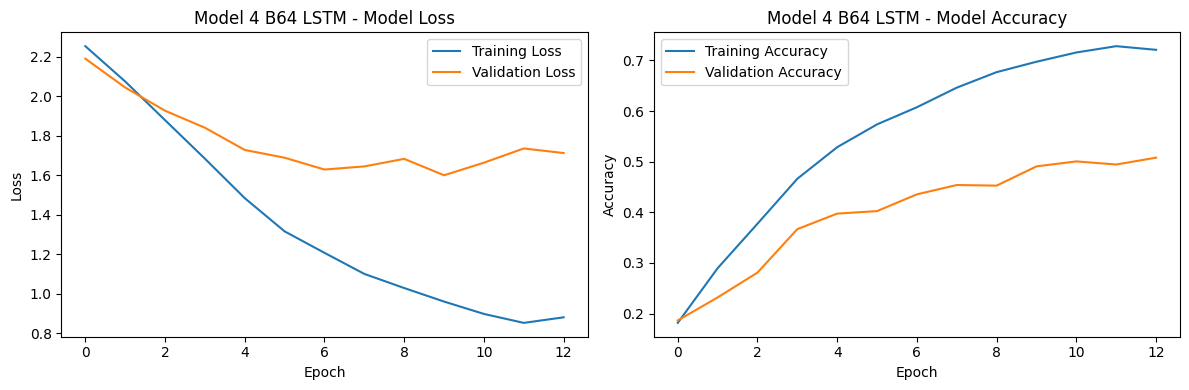


Final Validation Metrics:
Validation Accuracy: 0.5080
Validation Loss: 1.7121

Best Validation Metrics (Epoch 10):
Validation Accuracy: 0.4908
Validation Loss: 1.5994


In [ ]:
results_model3_64 = evaluate_first_fold(create_model3, "Model 3 B64 LSTM", batch_size= 64)

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


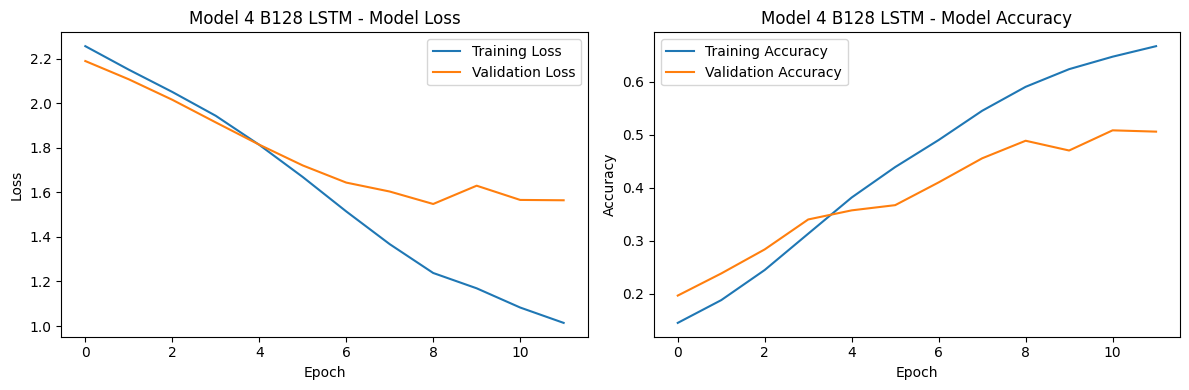


Final Validation Metrics:
Validation Accuracy: 0.5055
Validation Loss: 1.5642

Best Validation Metrics (Epoch 9):
Validation Accuracy: 0.4883
Validation Loss: 1.5475


In [ ]:
results_model3_64 = evaluate_first_fold(create_model3, "Model 3 B128 LSTM", batch_size= 128)

# 2.1 Simple Model Architectures(GRU)

In [23]:
def create_model0(input_shape, num_classes, learning_rate = 0.0001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model1(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model2(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model3(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_model4(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(96, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


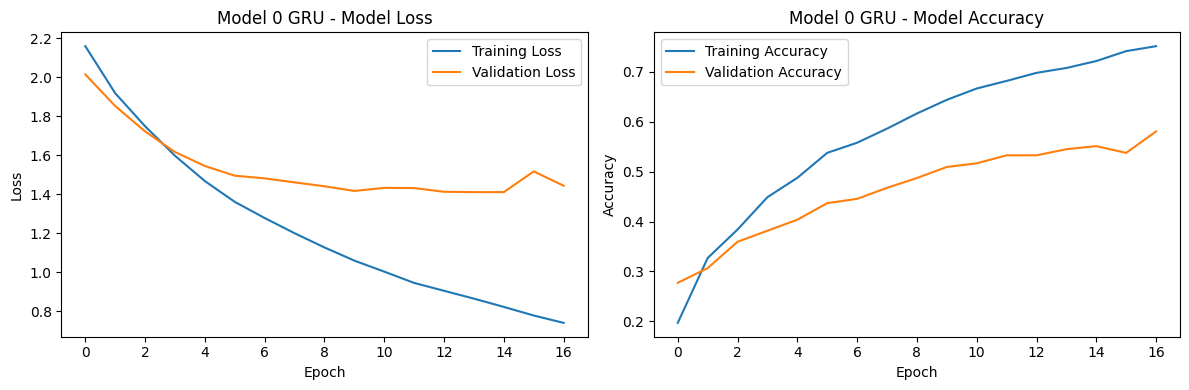


Final Validation Metrics:
Validation Accuracy: 0.5804
Validation Loss: 1.4439

Best Validation Metrics (Epoch 14):
Validation Accuracy: 0.5448
Validation Loss: 1.4111


In [24]:
results_model0 = evaluate_first_fold(create_model0, "Model 0 GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


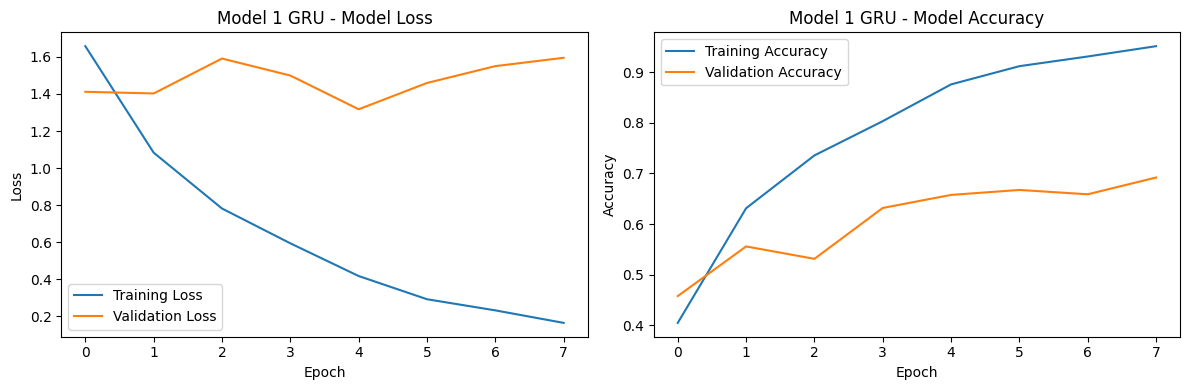


Final Validation Metrics:
Validation Accuracy: 0.6920
Validation Loss: 1.5954

Best Validation Metrics (Epoch 5):
Validation Accuracy: 0.6577
Validation Loss: 1.3176


In [25]:
results_model1 = evaluate_first_fold(create_model1, "Model 1 GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


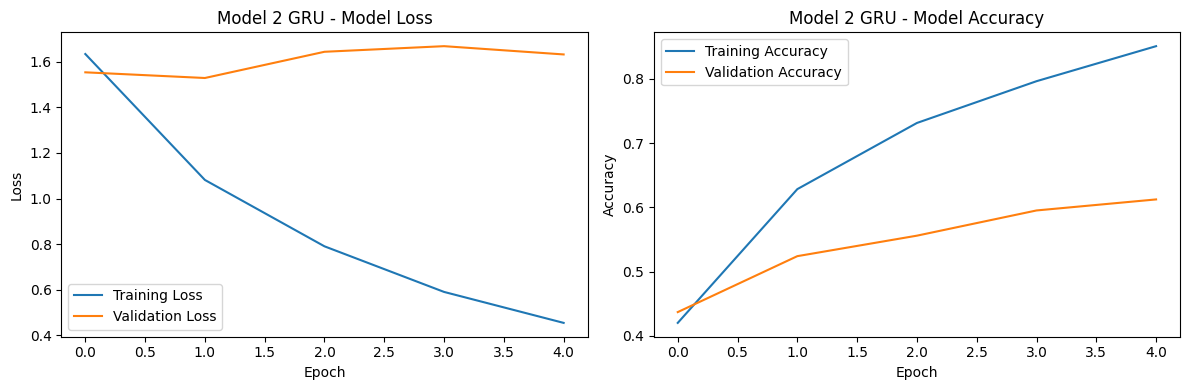


Final Validation Metrics:
Validation Accuracy: 0.6123
Validation Loss: 1.6314

Best Validation Metrics (Epoch 2):
Validation Accuracy: 0.5239
Validation Loss: 1.5282


In [26]:
results_model2 = evaluate_first_fold(create_model2, "Model 2 GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


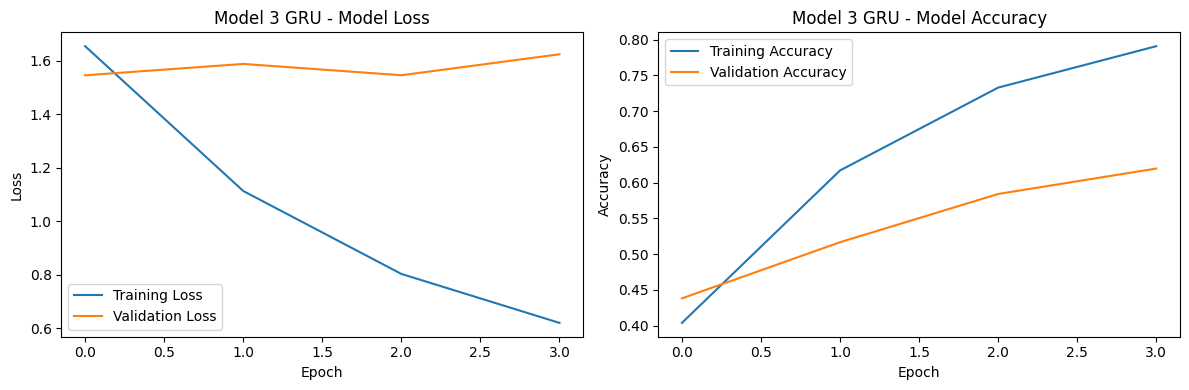


Final Validation Metrics:
Validation Accuracy: 0.6196
Validation Loss: 1.6247

Best Validation Metrics (Epoch 1):
Validation Accuracy: 0.4380
Validation Loss: 1.5460


In [27]:
results_model3 = evaluate_first_fold(create_model3, "Model 3 GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


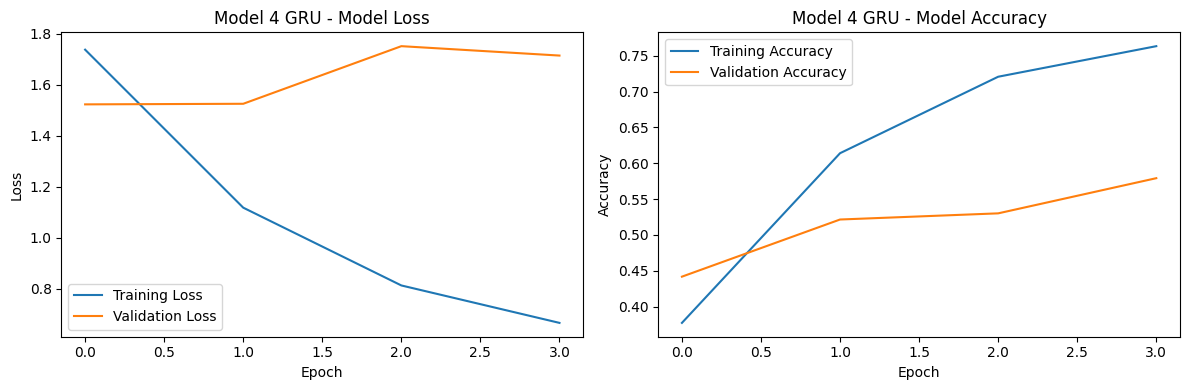


Final Validation Metrics:
Validation Accuracy: 0.5791
Validation Loss: 1.7142

Best Validation Metrics (Epoch 1):
Validation Accuracy: 0.4417
Validation Loss: 1.5228


In [28]:
results_model4 = evaluate_first_fold(create_model4, "Model 4 GRU")

# 2.2 Optimizers(GRU)

In [29]:
def create_modelrmsprop(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_modelsgd(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_modeladamw(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

def create_modeladadelta(input_shape, num_classes, learning_rate = 0.001):
    """Create model based on specified type"""
    from tensorflow.keras.layers import Input
    
    # Create input layer explicitly
    inputs = Input(shape=input_shape)
    masking = Masking(mask_value=0.0)(inputs)

    x = GRU(512, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(256, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(128, return_sequences=True)(masking)
    x = Dropout(0.3)(x)
    x = GRU(64)(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate),
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    return model



Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


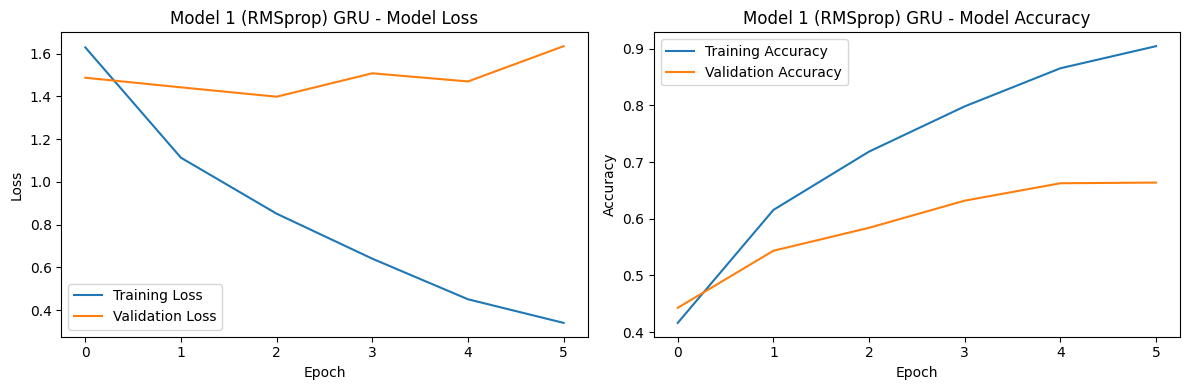


Final Validation Metrics:
Validation Accuracy: 0.6638
Validation Loss: 1.6346

Best Validation Metrics (Epoch 3):
Validation Accuracy: 0.5840
Validation Loss: 1.3983


In [30]:
results_modelrms = evaluate_first_fold(create_modelrmsprop, "Model 1 (RMSprop) GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


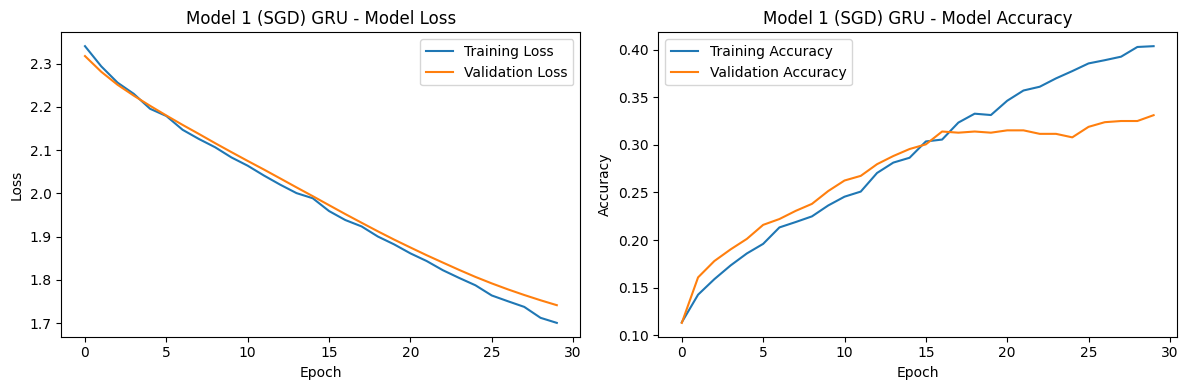


Final Validation Metrics:
Validation Accuracy: 0.3313
Validation Loss: 1.7414

Best Validation Metrics (Epoch 30):
Validation Accuracy: 0.3313
Validation Loss: 1.7414


In [31]:
results_modelsgd = evaluate_first_fold(create_modelsgd, "Model 1 (SGD) GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


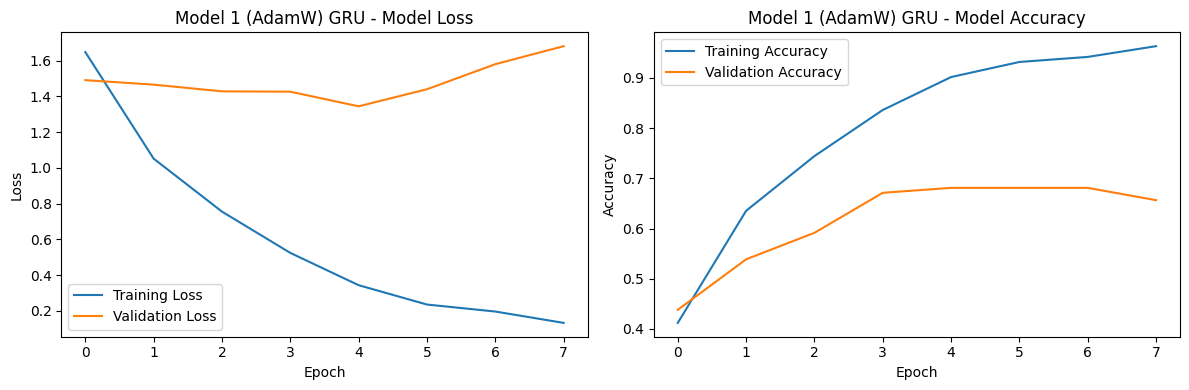


Final Validation Metrics:
Validation Accuracy: 0.6564
Validation Loss: 1.6807

Best Validation Metrics (Epoch 5):
Validation Accuracy: 0.6810
Validation Loss: 1.3442


In [32]:
results_modeladamw = evaluate_first_fold(create_modeladamw, "Model 1 (AdamW) GRU")

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


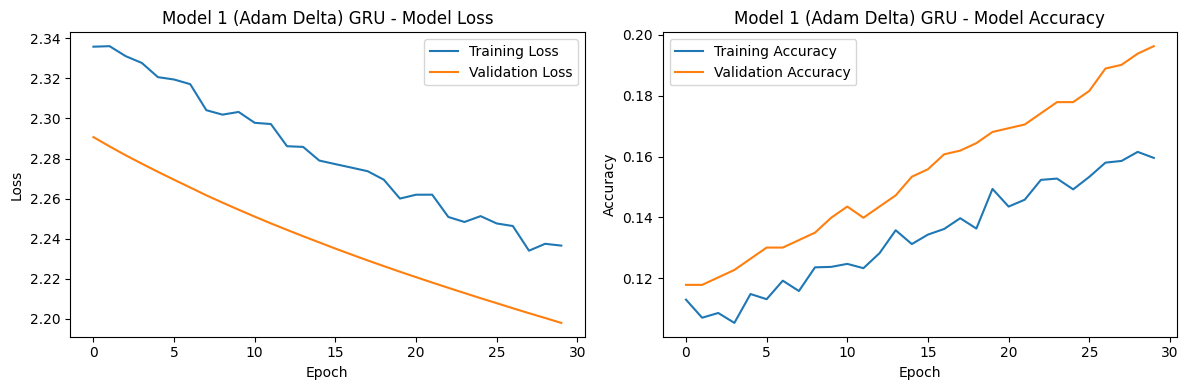


Final Validation Metrics:
Validation Accuracy: 0.1963
Validation Loss: 2.1979

Best Validation Metrics (Epoch 30):
Validation Accuracy: 0.1963
Validation Loss: 2.1979


In [33]:
results_modeladamdelta = evaluate_first_fold(create_modeladadelta, "Model 1 (Adam Delta) GRU")

# 2.3 Batch size(GRU)

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


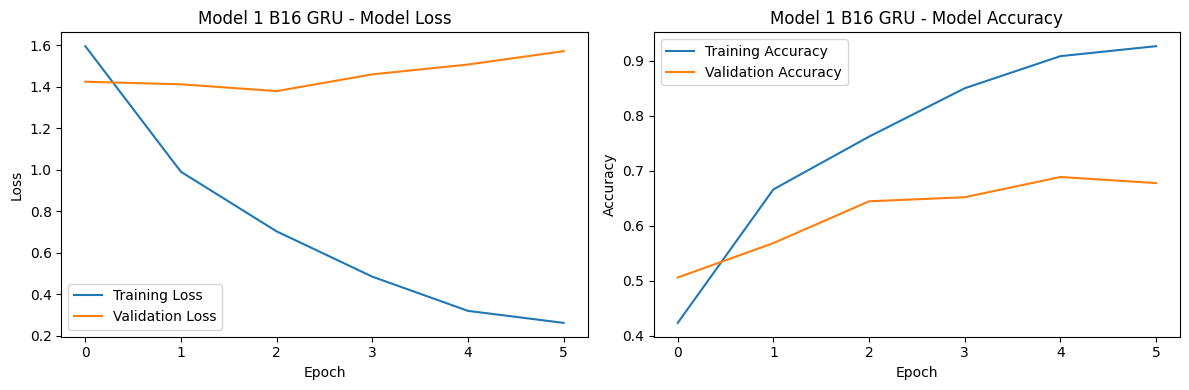


Final Validation Metrics:
Validation Accuracy: 0.6773
Validation Loss: 1.5721

Best Validation Metrics (Epoch 3):
Validation Accuracy: 0.6442
Validation Loss: 1.3794


In [34]:
results_model1_16 = evaluate_first_fold(create_model1, "Model 1 B16 GRU", batch_size= 16)

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


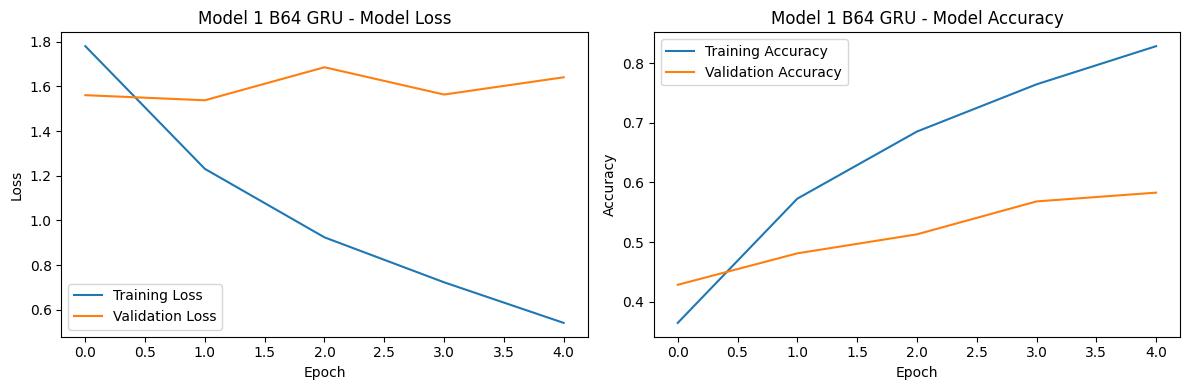


Final Validation Metrics:
Validation Accuracy: 0.5828
Validation Loss: 1.6407

Best Validation Metrics (Epoch 2):
Validation Accuracy: 0.4810
Validation Loss: 1.5379


In [35]:
results_model1_64 = evaluate_first_fold(create_model1, "Model 1 B64 GRU", batch_size= 64)

Could not load features for 151359-1-0-0
Could not load features for 151359-1-1-0
Could not load features for 151359-1-2-0
Could not load features for 151359-1-3-0
Could not load features for 155129-1-0-0
Could not load features for 155129-1-1-0
Could not load features for 160092-3-0-0
Could not load features for 160093-3-0-0
Could not load features for 162702-1-0-0
Could not load features for 170243-1-0-0
Could not load features for 17307-1-0-0
Could not load features for 43784-3-0-0
Could not load features for 43802-1-0-0
Could not load features for 43803-1-0-0
Could not load features for 76091-6-3-0
Could not load features for 76091-6-4-0
Could not load features for 87275-1-0-0
Could not load features for 87275-1-1-0
Could not load features for 87275-1-2-0
Could not load features for 87275-1-3-0
Could not load features for 87275-1-4-0
Could not load features for 87275-1-5-0
Could not load features for 155130-1-0-0


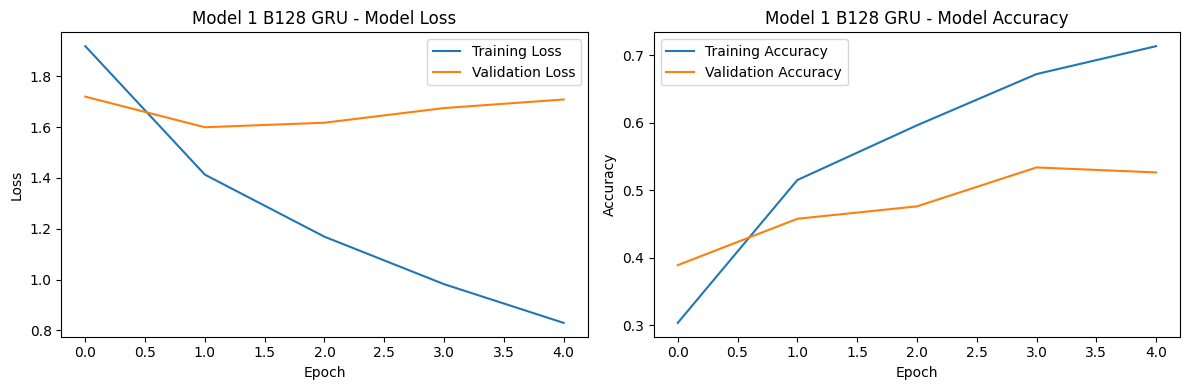


Final Validation Metrics:
Validation Accuracy: 0.5264
Validation Loss: 1.7088

Best Validation Metrics (Epoch 2):
Validation Accuracy: 0.4577
Validation Loss: 1.5996


In [36]:
results_model1_128 = evaluate_first_fold(create_model1, "Model 1 B128 GRU", batch_size= 128)